In [186]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import statistics
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [187]:
data = pd.read_csv("DATA.csv")

C:\Users\Evinl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [183]:
# #lits = list(data.columns)
# n = [0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]
# def mixed_types(x): 
#         if data.columns[i] == n:
#             print(data[i].dtypes)
# n = [0,19,49,59,118,129,130,131,134,135,136,139,145,146,147]
# mixed_types(x = n)

        

In [188]:
data.issue_d = pd.to_datetime(data.issue_d)
data.years = data.issue_d.dt.year
grouped = data.groupby(data.years, axis = 0)
data1 = grouped.apply(lambda x: x.sample(n=1000, replace=True))
data1 = data1.reset_index(drop = True)

C:\Users\Evinl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
#data1.columns.values

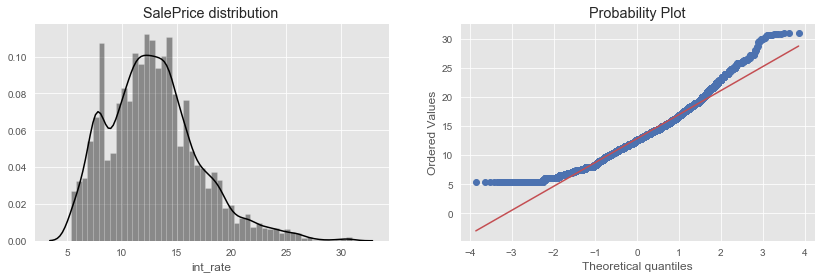

Skewness: 0.704607
Skewness: 0.754310


In [189]:
## Checking missingness on Y variables
data1.int_rate.isnull()
y = data1.int_rate
## Normality & linearity
fig, (ax1, res) = plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(y, color = 'black', ax = ax1)
ax1.set_title('SalePrice distribution')
res = stats.probplot(y, plot=plt)
plt.show()
## Skewness, Kurtosis 
y_skew, y_kurt = y.skew(), y.kurt()
print('Skewness: %f' % y_skew)
print('Skewness: %f' % y_kurt)

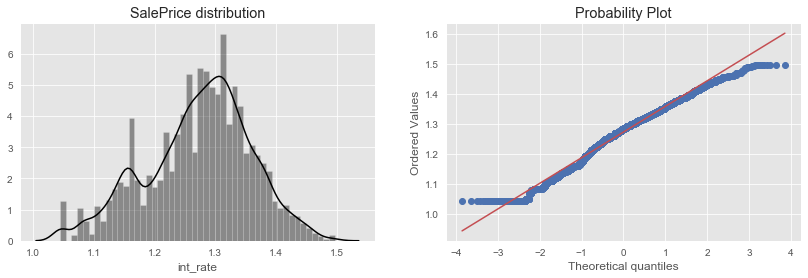

Skewness: -0.355717
Skewness: -0.187461


In [266]:
y = np.log1p(y) 
fig, (ax1, res) = plt.subplots(1, 2, figsize=(14, 4))
sns.distplot(y, color = 'black', ax = ax1)
ax1.set_title('SalePrice distribution')
res = stats.probplot(y, plot=plt)
plt.show()

y_skew, y_kurt = y.skew(), y.kurt()
print('Skewness: %f' % y_skew)
print('Skewness: %f' % y_kurt)

## If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

In [295]:
#data1.hardship_type[data1.hardship_type.notnull()].count()
display(data1.hardship_type[~data1.hardship_type.isnull()])
#data1.policy_code
display(data1.deferral_term[~data1.deferral_term.isnull()])

6035     INTEREST ONLY-3 MONTHS DEFERRAL
6822     INTEREST ONLY-3 MONTHS DEFERRAL
7648     INTEREST ONLY-3 MONTHS DEFERRAL
8060     INTEREST ONLY-3 MONTHS DEFERRAL
8128     INTEREST ONLY-3 MONTHS DEFERRAL
8134     INTEREST ONLY-3 MONTHS DEFERRAL
8443     INTEREST ONLY-3 MONTHS DEFERRAL
8729     INTEREST ONLY-3 MONTHS DEFERRAL
8769     INTEREST ONLY-3 MONTHS DEFERRAL
8832     INTEREST ONLY-3 MONTHS DEFERRAL
8852     INTEREST ONLY-3 MONTHS DEFERRAL
8889     INTEREST ONLY-3 MONTHS DEFERRAL
8928     INTEREST ONLY-3 MONTHS DEFERRAL
9115     INTEREST ONLY-3 MONTHS DEFERRAL
9532     INTEREST ONLY-3 MONTHS DEFERRAL
9623     INTEREST ONLY-3 MONTHS DEFERRAL
9635     INTEREST ONLY-3 MONTHS DEFERRAL
9730     INTEREST ONLY-3 MONTHS DEFERRAL
9882     INTEREST ONLY-3 MONTHS DEFERRAL
9973     INTEREST ONLY-3 MONTHS DEFERRAL
9981     INTEREST ONLY-3 MONTHS DEFERRAL
10025    INTEREST ONLY-3 MONTHS DEFERRAL
10159    INTEREST ONLY-3 MONTHS DEFERRAL
10417    INTEREST ONLY-3 MONTHS DEFERRAL
10555    INTERES

6035     3.0
6822     3.0
7648     3.0
8060     3.0
8128     3.0
8134     3.0
8443     3.0
8729     3.0
8769     3.0
8832     3.0
8852     3.0
8889     3.0
8928     3.0
9115     3.0
9532     3.0
9623     3.0
9635     3.0
9730     3.0
9882     3.0
9973     3.0
9981     3.0
10025    3.0
10159    3.0
10417    3.0
10555    3.0
10598    3.0
Name: deferral_term, dtype: float64

In [365]:
pd.set_option('display.max_columns', 999)
correlation = data1.corr(method='pearson')
int_rate_corr = pd.DataFrame(correlation['int_rate']).T
int_rate_corr
# sss = pd.DataFrame(int_rate_corr.isnull().sum().sort_values(ascending=False))
# sss


#int_rate_corr.plot.bar(color="b")

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
int_rate,NaN,0.211543,0.213795,0.213749,1.0,0.224075,-0.011114,0.154783,0.098553,-0.522172,-0.522168,0.105004,0.028841,0.217482,0.050357,0.087698,0.035089,0.340489,0.014734,0.051082,0.051077,0.204222,0.210004,0.076701,0.4654,0.084551,0.130568,0.097012,0.121816,-0.284995,-0.216415,0.024904,-0.006326,NaN,-0.070965,0.164385,0.010429,0.028023,-0.07955,0.161906,0.020527,0.172139,0.171833,-0.121982,0.029603,0.142908,0.125106,0.125318,-0.089025,0.27708,-0.186776,0.129906,0.015456,0.170697,0.165261,-0.082553,-0.300005,0.290551,0.02536,0.020397,-0.060186,-0.127561,-0.087732,-0.109066,-0.066133,-0.070577,-0.023821,-0.160951,-0.035287,0.068342,0.01164,0.084175,-0.068147,-0.069233,0.022944,-0.014853,-0.04412,0.08479,-0.011139,-0.004799,0.005059,0.03446,0.177302,-0.09246,0.283678,0.068287,0.037196,-0.120166,0.012255,-0.247245,-0.00835,-0.025234,-0.327443,-0.327443,0.121307,-0.166686,-0.1458,0.217063,-0.051307,-0.173827,0.0569,0.008526,-0.031458,NaN,0.558288,NaN,-0.316193,0.547066,0.326734,0.132062,0.314295,-0.019103,0.112787


In [145]:
missings = data1.isnull().sum()
counts = data1.isnull().count()
percent = (missings / counts) * 100 
percent = percent[percent > 0].sort_values(ascending=False)

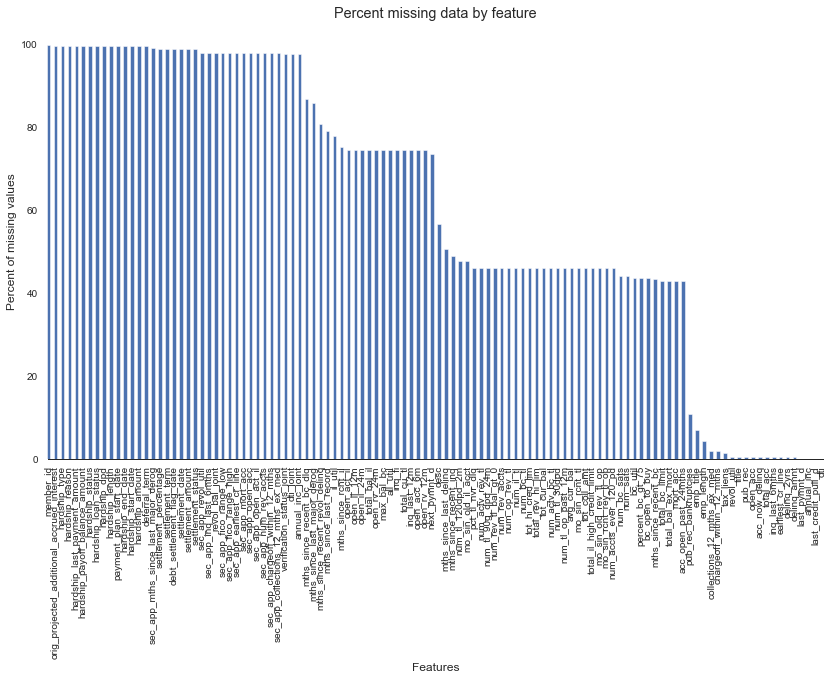

In [146]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(14, 8))
sns.set_color_codes(palette='deep')
percent.plot.bar(color="b")
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)